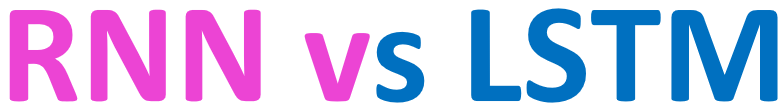<br>
**Prepared by M. EL ATOUCH**

**Introduction**

The aim of this study is to compare to accuracies of RNN and LSTM. I compare results of RNN and LSTM to each others and I changed hyperparameters in these methods and I compared them again with their modified versions.

**What are the application areas of RNN & LSTM?**
* Image Captioning
* **`Time Series Prediction`**
* Natural Language Processing
* Machine Translation
* Music and Audio Generation
* ...

### **Content**
* [Import Data](#3)
* [RNN](#4)
* [Visualizing of RNN](#5)
* [LSTM](#6)
* [Visualizing of LSTM](#7)
* [Visualizing of RNN vs LSTM](#8)
* [Modified RNN](#9)
* [Visualizing of RNN vs Modified RNN](#10)
* [Modified LSTM](#11)
* [Visualizing of LSTM vs Modified LSTM](#12)
* [Visualizing of RNN vs Modified RNN vs LSTM vs Modified LSTM](#13)
* [Visualizing of Modified RNN vs Modified LSTM](#14)
* [Conclusion](#15)

In [90]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

<a id="3"></a>
### Import Data

In [91]:
data = pd.read_csv('dataset.csv', sep=",")
# Let's examine a few examples from our data
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


**OHLC**
* Open  = Open Price of stock = The price at which stock opened

* High  = The highest price the stock touched

* Low   = The lowest price the stock touched

* Close = Close price of stock = The price at which stock closed

**Volume** is the total number of shares traded in a security period.

**OHLC illustration**
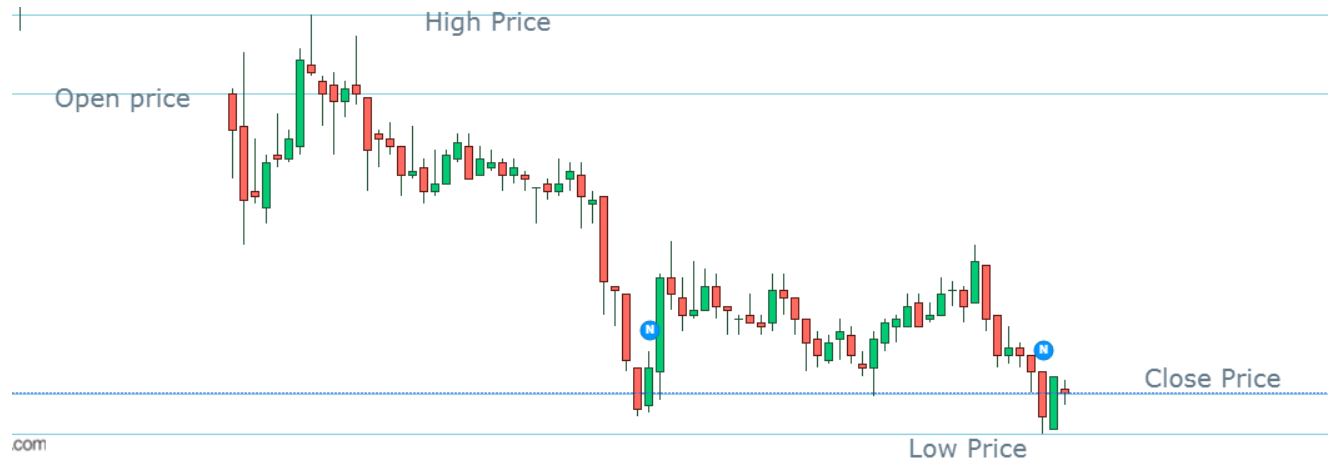

In [92]:
print("Data Shape -->", data.shape)

Data Shape --> (1258, 6)


In [93]:
print("Do you have a null column? \n", data.isna().sum())

Do you have a null column? 
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [94]:
# We assign column "Open" to variable "Data"
data = data.loc[:,["Open"]].values

In [95]:
training_size = int(len(data)*0.80)
data_len = len(data)

train, test = data[0:training_size],data[training_size:data_len]

In [96]:
print("Shape of data --> ", data.shape)
print("Train shape   --> ", train.shape)
print("Test shape    --> ", test.shape)

Shape of data -->  (1258, 1)
Train shape   -->  (1006, 1)
Test shape    -->  (252, 1)


**Normalize data**

**Why do we normalize data?**
* Normalization is very important in all deep learning in general.
* Normalization makes the properties more consistent. This allows the model to predict its output more accurately.

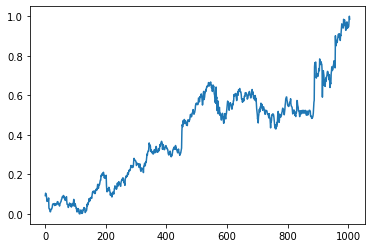

In [97]:
# Feature scalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))   # defining of Scaler
train_scaled = scaler.fit_transform(train)    # applying to Scaler to train

plt.plot(train_scaled)
plt.show()

**GOAL?**
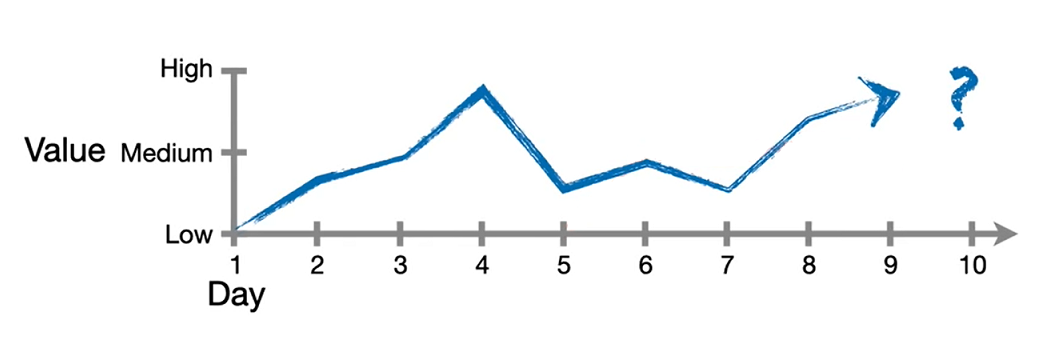

**X_train? y_train?**

In [98]:
X_train = []
y_train = []
timesteps = 50
''' 
    We will make this distinction 50 steps 50 steps. 
    So we will train in 50 steps. 
    We will anticipate step 51.
'''
for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping X_train for efficient modelling
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Dimension of array is 3.

**Why do we reshape ?**

* One of the most basic points to be considered in RNNs is that they want their input to have 3 dimensions.
* These 3 sizes are typically:
  * The size of data we have
  * Number of steps
  * Number of features


In [99]:
print("The size of data we have --> ", X_train.shape[0])
print("Number of steps          --> ", X_train.shape[1])
print("Number of features       --> ", X_train.shape[2])

The size of data we have -->  956
Number of steps          -->  50
Number of features       -->  1


In [100]:
inputs = data[len(data) - len(test) - timesteps:]
inputs = scaler.transform(inputs) # min max scaler

In [101]:
X_test = []
y_test=[]
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0]) # we get 50 elements by shifting from 0 to 50, from 1 to 51
    y_test.append(inputs[i,0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

<a id="4"></a>
### RNN


In this section, we create and fit  RNN model.
  * Create the Model
  * Compile the Model
  * Fit the Model

In [102]:
# Importing the Keras libraries and packages
from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout # it block to overfitting

**Create the Model**

In [103]:
# Initializing the RNN
rnn = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
rnn.add(Dropout(0.2)) 

# Adding a second RNN layer and some Dropout regularisation.
rnn.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
rnn.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation. 
rnn.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
rnn.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
rnn.add(SimpleRNN(units=50))
rnn.add(Dropout(0.2))


# Adding the output layer
rnn.add(Dense(units=1))

* **units :** Positive integer, specifies the number of neurons in the layer.
* **activation :** Activation function to use.
* **return_sequences :** Boolean. This argument is set to True, which means that the output of the RNN layer will have the same length as the input sequence, and each element of the output will be the result of processing a single time step of the input sequence.
* **inputs :** It specifies the shape of the input data for the layer.
(It is a tuple that defines the number of time steps in the input data and the number of features for each time step.)

**Compile the Model**

In [104]:
# Compiling the RNN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae'])

* **optimizer :** The optimizer does the process of updating our parameters for us here.
* **loss :** It is a number that indicates how good or bad the model is to its prediction. As it approaches 0, the error starts to decrease.

In [105]:
rnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 50, 50)            2600      
                                                                 
 dropout_20 (Dropout)        (None, 50, 50)            0         
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 50, 50)            5050      
                                                                 
 dropout_21 (Dropout)        (None, 50, 50)            0         
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 50, 50)            5050      
                                                                 
 dropout_22 (Dropout)        (None, 50, 50)            0         
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 50)               

**Fit the Model**

In [106]:
# Fitting the RNN to the Training set
rnn.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 5s 35ms/step - loss: 0.4532 - mae: 0.5366
Epoch 2/100
30/30 [==============================] - 1s 35ms/step - loss: 0.2527 - mae: 0.3998
Epoch 3/100
30/30 [==============================] - 1s 34ms/step - loss: 0.2056 - mae: 0.3582
Epoch 4/100
30/30 [==============================] - 1s 35ms/step - loss: 0.1514 - mae: 0.3067
Epoch 5/100
30/30 [==============================] - 1s 34ms/step - loss: 0.1152 - mae: 0.2686
Epoch 6/100
30/30 [==============================] - 1s 33ms/step - loss: 0.0929 - mae: 0.2438
Epoch 7/100
30/30 [==============================] - 1s 34ms/step - loss: 0.0823 - mae: 0.2284
Epoch 8/100
30/30 [==============================] - 1s 34ms/step - loss: 0.0727 - mae: 0.2097
Epoch 9/100
30/30 [==============================] - 1s 34ms/step - loss: 0.0537 - mae: 0.1846
Epoch 10/100
30/30 [==============================] - 2s 56ms/step - loss: 0.0493 - mae: 0.1748
Epoch 11/100
30/30 [=============================

* **Epochs :** The forward and backward processing of data one by one. In other words, we can simply call it a complete educational tour. Education is determined by the number of eras. 
* **Batch Size :** Basically, it takes a long time for us to train the data one by one. During training how much of the data, indicates that it will be trained.  

**Prediction**

In [107]:
y_pred1 = rnn.predict(X_test)
predicted_data = scaler.inverse_transform(y_pred1)

8/8 [==============================] - 0s 10ms/step


**inverse_transform :** If you remember before training our model, we normalized our data. converts these values ​​to before normalization.

<a id="5"></a>
### Evaluate the model (Visualization of RNN)


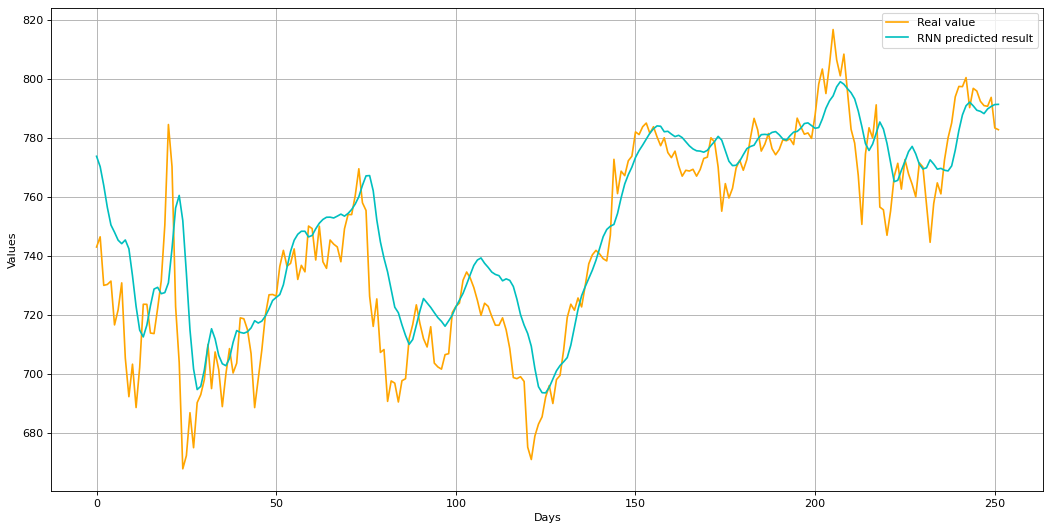

In [108]:
plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test, color="orange", label="Real value")
plt.plot(predicted_data, color="c", label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

Here we have the results of our prediction. As we can see on the chart that with RNN method we don't have a good result. So let's check LSTM method, then we can compare both results.

In [109]:
# Evaluate the model
loss_rnn, mae_rnn = rnn.evaluate(X_test, y_test)
print("Loss:", loss_rnn)
print("MAE:", mae_rnn)

8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - mae: 0.0241
Loss: 0.001179852639324963
MAE: 0.024072816595435143


<a id="6"></a>
### LSTM

In this section, we create and fit  LSTM model.
  * Create the Model
  * Compile the Model
  * Fit the Model

In [110]:
# Importing the Keras libraries and packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

**Create the Model**

In [111]:
# Initializing the LSTM
lstm = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
lstm.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm.add(Dropout(0.2)) 

# Adding a second LSTM layer and some Dropout regularisation.
lstm.add(LSTM(units=50, activation='tanh', return_sequences=True))
lstm.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation. 
lstm.add(LSTM(units=50, activation='tanh', return_sequences=True))
lstm.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation.
lstm.add(LSTM(units=50))
lstm.add(Dropout(0.2))


# Adding the output layer
lstm.add(Dense(units=1))

**Compile the Model**

In [112]:
# Compeling the LSTM
lstm.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae'])

In [113]:
lstm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 50, 50)            10400     
                                                                 
 dropout_24 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50, 50)            20200     
                                                                 
 dropout_25 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_12 (LSTM)              (None, 50, 50)            20200     
                                                                 
 dropout_26 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_13 (LSTM)              (None, 50)               

**Fit the Model**

In [114]:
# Fitting the LSTM to the Training set
lstm.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 8s 81ms/step - loss: 0.0409 - mae: 0.1442
Epoch 2/100
30/30 [==============================] - 2s 77ms/step - loss: 0.0072 - mae: 0.0630
Epoch 3/100
30/30 [==============================] - 2s 77ms/step - loss: 0.0052 - mae: 0.0537
Epoch 4/100
30/30 [==============================] - 2s 77ms/step - loss: 0.0048 - mae: 0.0505
Epoch 5/100
30/30 [==============================] - 3s 90ms/step - loss: 0.0054 - mae: 0.0546
Epoch 6/100
30/30 [==============================] - 2s 81ms/step - loss: 0.0047 - mae: 0.0510
Epoch 7/100
30/30 [==============================] - 2s 77ms/step - loss: 0.0046 - mae: 0.0503
Epoch 8/100
30/30 [==============================] - 2s 78ms/step - loss: 0.0045 - mae: 0.0493
Epoch 9/100
30/30 [==============================] - 2s 79ms/step - loss: 0.0043 - mae: 0.0479
Epoch 10/100
30/30 [==============================] - 3s 95ms/step - loss: 0.0041 - mae: 0.0472
Epoch 11/100
30/30 [=============================

**Prediction**

In [115]:
y_pred2 = lstm.predict(X_test)
predicted_data2 = scaler.inverse_transform(y_pred2)

8/8 [==============================] - 1s 21ms/step


<a id="7"></a>
### Evaluate the model (Visualization of LSTM)

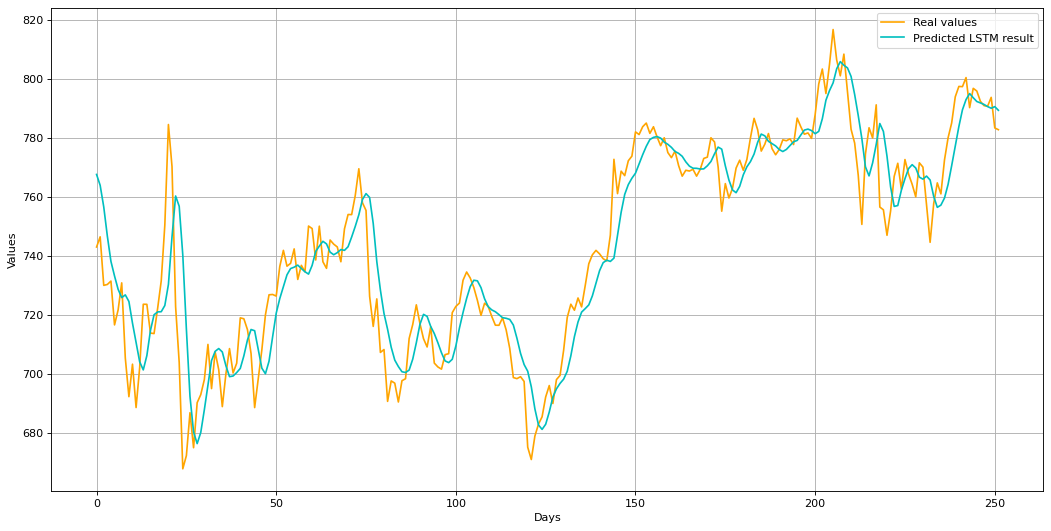

In [116]:
plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test, color="orange", label="Real values")
plt.plot(predicted_data2, color="c", label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()


In [117]:
# Evaluate the model
loss_lstm, mae_lstm = lstm.evaluate(X_test, y_test)
print("Loss:", loss_lstm)
print("MAE:", mae_lstm)

8/8 [==============================] - 1s 19ms/step - loss: 7.6429e-04 - mae: 0.0197
Loss: 0.000764291500672698
MAE: 0.01966318115592003


<a id="8"></a>
### Visualization of RNN vs. LSTM

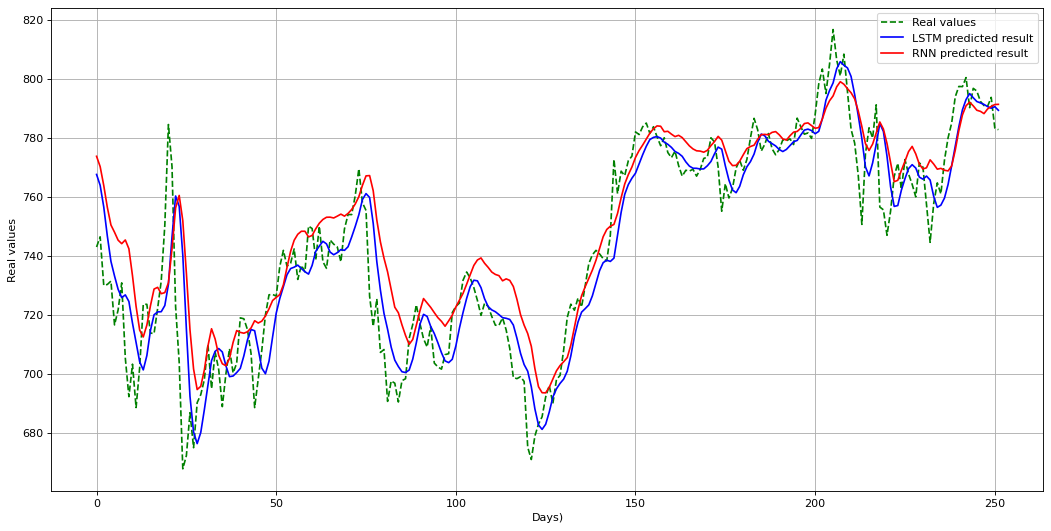

In [118]:
plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test, color="green", linestyle='dashed', label="Real values")
plt.plot(predicted_data2, color="blue", label="LSTM predicted result")
plt.plot(predicted_data, color="red", label="RNN predicted result") 
plt.legend()
plt.xlabel("Days)")
plt.ylabel("Real values")
plt.grid(True)
plt.show()

In [119]:
df = {'Loss': [loss_rnn, loss_lstm], 'MAE': [mae_rnn, mae_lstm]}
pd.DataFrame(data=df, index=['RNN', 'LSTM'])

,Loss,MAE
RNN,0.001180,0.024073
LSTM,0.000764,0.019663


LSTM looks greatly successful from the RNN.

Now we change hyperparemeter like: units, number of layers, epochs, batch_size, activation in RNN

<a id="9"></a>
### Modified RNN

In [120]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [121]:
from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout 

# Initializing the RNN
rnn_modified = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn_modified.add(SimpleRNN(units=100, activation='relu', return_sequences=True, input_shape=(None, 1)))
rnn_modified.add(Dropout(0.2))

# Adding the first RNN layer and some Dropout regularisation
rnn_modified.add(SimpleRNN(units=50))
rnn_modified.add(Dropout(0.2))

# Adding the output layer
rnn_modified.add(Dense(units=1)) 

# Compiling the RNN
rnn_modified.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae'])

# Fitting the RNN to the Training set
rnn_modified.fit(X_train, y_train, epochs=300, batch_size=16, validation_data =(X_test, y_test), callbacks =[earlystopping])

Epoch 1/300
60/60 [==============================] - 3s 22ms/step - loss: 0.0345 - mae: 0.1301 - val_loss: 0.0011 - val_mae: 0.0255
Epoch 2/300
60/60 [==============================] - 1s 19ms/step - loss: 0.0118 - mae: 0.0788 - val_loss: 0.0027 - val_mae: 0.0469
Epoch 3/300
60/60 [==============================] - 2s 25ms/step - loss: 0.0085 - mae: 0.0651 - val_loss: 0.0018 - val_mae: 0.0373
Epoch 4/300
60/60 [==============================] - 1s 23ms/step - loss: 0.0062 - mae: 0.0553 - val_loss: 8.7825e-04 - val_mae: 0.0210
Epoch 5/300
60/60 [==============================] - 1s 19ms/step - loss: 0.0043 - mae: 0.0472 - val_loss: 0.0022 - val_mae: 0.0421
Epoch 6/300
60/60 [==============================] - 1s 19ms/step - loss: 0.0041 - mae: 0.0454 - val_loss: 8.5646e-04 - val_mae: 0.0209
Epoch 7/300
60/60 [==============================] - 1s 19ms/step - loss: 0.0041 - mae: 0.0456 - val_loss: 6.7739e-04 - val_mae: 0.0183
Epoch 8/300
60/60 [==============================] - 1s 19ms/ste

In [122]:
y_pred3 = rnn_modified.predict(X_test)
predicted_data_modified = scaler.inverse_transform(y_pred3)

8/8 [==============================] - 0s 5ms/step


<a id="10"></a>
### Visualization of RNN vs Modified RNN

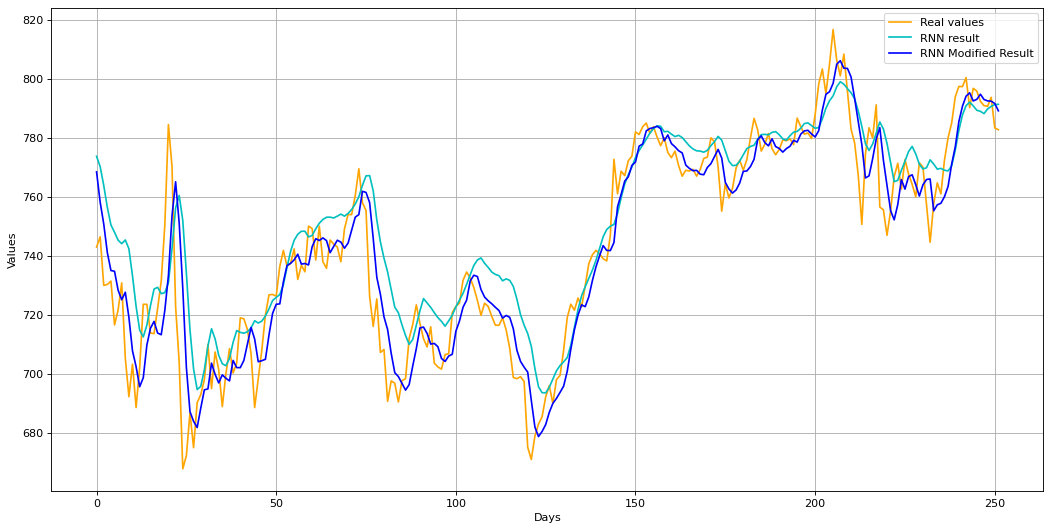

In [123]:
plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test, color="orange", label="Real values")
plt.plot(predicted_data, color="c", label="RNN result")
plt.plot(predicted_data_modified, color="blue", label="RNN Modified Result")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [124]:
# Evaluate the model
loss_rnn_modified, mae_rnn_modified = rnn_modified.evaluate(X_test, y_test)
print("Loss:", loss_rnn_modified)
print("MAE:", mae_rnn_modified)

8/8 [==============================] - 0s 7ms/step - loss: 6.0921e-04 - mae: 0.0176
Loss: 0.0006092070252634585
MAE: 0.01758427917957306


It looks Modified RNN more successful than RNN.

<a id="11"></a>
### Modified LSTM

In [125]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [126]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler 

# Initializing the LSTM
lstm_modified = Sequential()

# Adding the LSTM layer
lstm_modified.add(LSTM(10, input_shape=(None, 1))) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node)

# Adding the output layer
lstm_modified.add(Dense(units=1)) 

# Compiling the LSTM
lstm_modified.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae'])

# Fitting the LSTM to the Training set
lstm_modified.fit(X_train, y_train, epochs=200, batch_size=4, validation_data =(X_test, y_test), callbacks =[earlystopping])

Epoch 1/200
239/239 [==============================] - 4s 13ms/step - loss: 0.0538 - mae: 0.1399 - val_loss: 0.0047 - val_mae: 0.0579
Epoch 2/200
239/239 [==============================] - 2s 8ms/step - loss: 0.0023 - mae: 0.0364 - val_loss: 0.0022 - val_mae: 0.0374
Epoch 3/200
239/239 [==============================] - 2s 9ms/step - loss: 0.0017 - mae: 0.0310 - val_loss: 0.0018 - val_mae: 0.0348
Epoch 4/200
239/239 [==============================] - 2s 10ms/step - loss: 0.0014 - mae: 0.0274 - val_loss: 0.0017 - val_mae: 0.0340
Epoch 5/200
239/239 [==============================] - 2s 9ms/step - loss: 0.0012 - mae: 0.0244 - val_loss: 0.0015 - val_mae: 0.0304
Epoch 6/200
239/239 [==============================] - 2s 8ms/step - loss: 0.0011 - mae: 0.0231 - val_loss: 0.0014 - val_mae: 0.0276
Epoch 7/200
239/239 [==============================] - 2s 9ms/step - loss: 0.0010 - mae: 0.0226 - val_loss: 0.0013 - val_mae: 0.0265
Epoch 8/200
239/239 [==============================] - 2s 9ms/step 

In [127]:
y_pred4 = lstm_modified.predict(X_test)
predicted_data2_modified = scaler.inverse_transform(y_pred4)

8/8 [==============================] - 0s 5ms/step


<a id="12"></a>
### Visualization of LSTM vs Modified LSTM

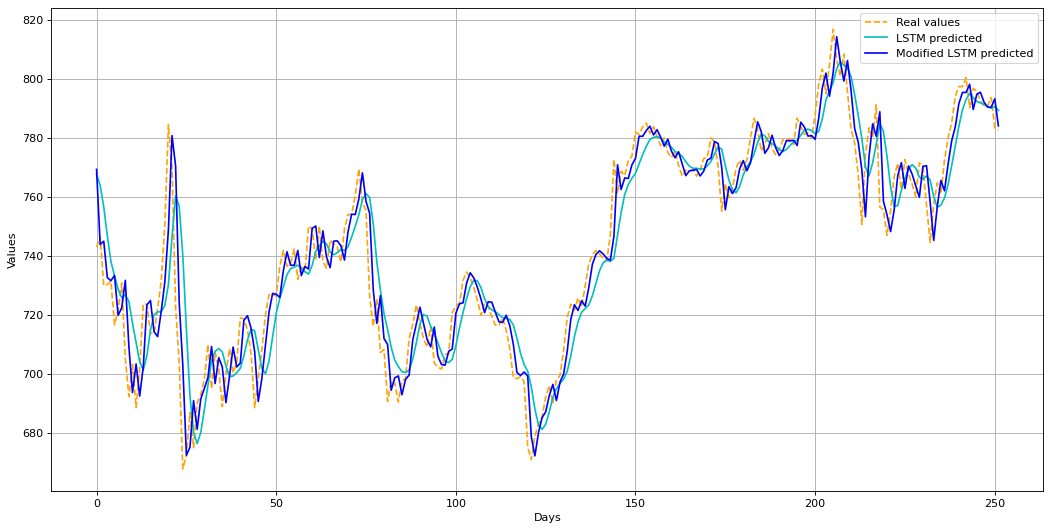

In [128]:
plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test, color="orange", label="Real values", linestyle="dashed")
plt.plot(predicted_data2, color="c", label="LSTM predicted")
plt.plot(predicted_data2_modified, color="blue", label="Modified LSTM predicted")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()


In [129]:
# Evaluate the model
loss_lstm_modified, mae_lstm_modified = lstm_modified.evaluate(X_test, y_test)
print("Loss:", loss_lstm_modified)
print("MAE:", mae_lstm_modified)

8/8 [==============================] - 0s 4ms/step - loss: 3.8878e-04 - mae: 0.0143
Loss: 0.0003887779894284904
MAE: 0.014300295151770115


Modified LSTM looks more successful than LSTM.

### Visualization of LSTM vs Modified LSTM vs RNN vs Modified RNN

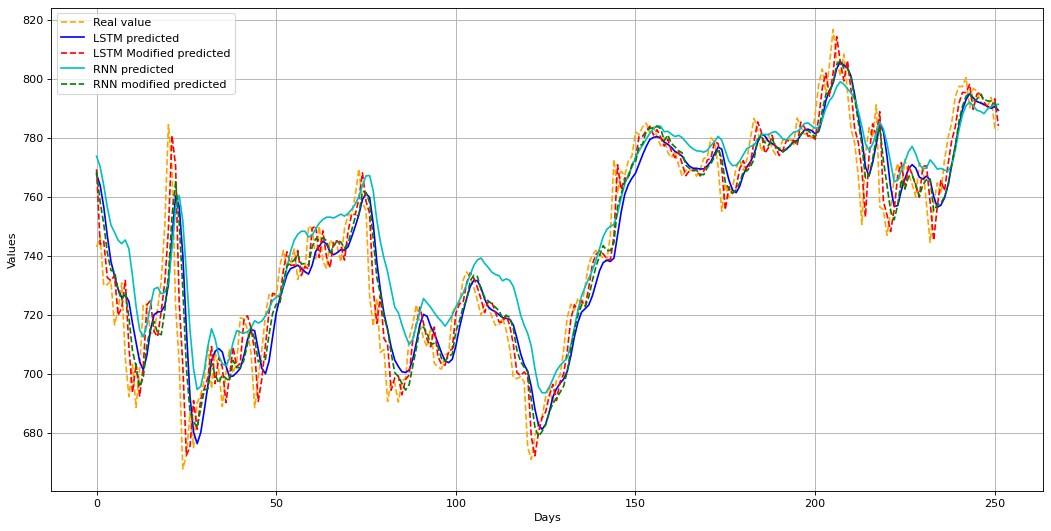

In [130]:
# visualization LSTM vs LSTM modified vs RNN vs RNN modified

plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test, color="orange", label="Real value", linestyle="dashed")
plt.plot(predicted_data2, color="blue", label="LSTM predicted")
plt.plot(predicted_data2_modified, color="red", linestyle="dashed", label="LSTM Modified predicted")
plt.plot(predicted_data, color="c", label="RNN predicted")
plt.plot(predicted_data_modified, color="green", linestyle="dashed", label="RNN modified predicted")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()


<a id="13"></a>
### Visualization of Modified LSTM vs Modified RNN

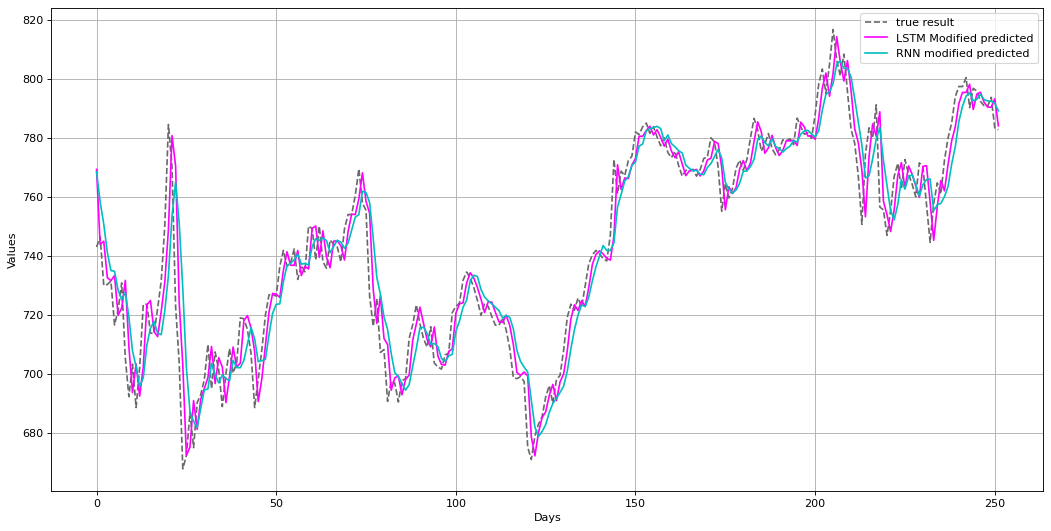

In [131]:
# Visualization Modified RNN vs Modified LSTM

plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test, color="DimGray", linestyle= "dashed", label="true result")
plt.plot(predicted_data2_modified, color="Magenta",  label="LSTM Modified predicted")
plt.plot(predicted_data_modified, color="c",  label="RNN modified predicted")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [132]:
df = {'Loss': [loss_rnn_modified, loss_lstm_modified], 'MAE': [mae_rnn_modified, mae_lstm_modified]}
pd.DataFrame(data=df, index=['RNN', 'LSTM'])

,Loss,MAE
RNN,0.000609,0.017584
LSTM,0.000389,0.014300


### Conclusion
Changing hyperparameter can increase to accuracy.

LSTM looks more successful than RNN in predict to values about time.

**The main differece of LSTM from RNN is that LSTM can store data longer than RNN.**

<h1 align="center">Thank you</h1>
<h1 align="center">Do you have any questions❔</h1>